In [ ]:
# ==================== Setup & Installations ====================
from google.colab import files

# Install Kaggle library
!pip install -q kaggle
!mkdir -p ~/.kaggle
files.upload()  # Upload your kaggle.json file

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip skin-cancer-mnist-ham10000.zip

# ==================== Imports ====================
import os
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications import VGG19, DenseNet169
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, Multiply, GlobalAveragePooling2D, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
import pickle

# ==================== Dataset Preparation ====================
IMG_SIZE = (224, 224)
base_skin_dir = "/content/"
df_meta = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

# Map image paths
imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))
}

# Label dictionary
lesion_type_dict = {
    'nv': 'Melanocytic nevi', 'mel': 'Melanoma', 'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma', 'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions', 'df': 'Dermatofibroma'
}

# Filter selected classes
df_meta['path'] = df_meta['image_id'].map(imageid_path_dict.get)
df_meta['cell_type'] = df_meta['dx'].map(lesion_type_dict.get)
classes = ['df', 'akiec', 'vasc']
df_meta = df_meta[df_meta['dx'].isin(classes)]
df_meta['cell_type_idx'] = pd.Categorical(df_meta['cell_type']).codes

# Load and preprocess images
def load_and_preprocess_image(path):
    img = load_img(path, target_size=IMG_SIZE)
    img = img_to_array(img) / 255.0
    return img

X = np.array([load_and_preprocess_image(path) for path in df_meta['path']])
y = df_meta['cell_type_idx'].values



Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

📘 Starting training from epoch 0 to 100
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4861 - loss: 1.2320   
Epoch 1: val_loss improved from inf to 0.75705, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 131s 6s/step - accuracy: 0.4873 - loss: 1.2286 - val_accuracy: 0.7009 - val_loss: 0.7570 - learning_rate: 1.0000e-04
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.5807 - loss: 0.9714
Epoch 2: val_loss improved from 0.75705 to 0.64131, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5815 - loss: 0.9694 - val_accuracy: 0.7607 - val_loss: 0.6413 - learning_rate: 1.0000e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.6699 - loss: 0.8178
Epoch 3: val_loss improved from 0.64131 to 0.61868, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 588ms/step - accuracy: 0.6693 - loss: 0.8184 - val_accuracy: 0.7436 - val_loss: 0.6187 - learning_rate: 1.0000e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.7220 - loss: 0.6947
Epoch 4: val_loss improved from 0.61868 to 0.55468, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 675ms/step - accuracy: 0.7222 - loss: 0.6961 - val_accuracy: 0.7692 - val_loss: 0.5547 - learning_rate: 1.0000e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.7204 - loss: 0.7033
Epoch 5: val_loss improved from 0.55468 to 0.52049, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 625ms/step - accuracy: 0.7194 - loss: 0.7046 - val_accuracy: 0.8034 - val_loss: 0.5205 - learning_rate: 1.0000e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.7557 - loss: 0.6222
Epoch 6: val_loss improved from 0.52049 to 0.48167, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 582ms/step - accuracy: 0.7552 - loss: 0.6248 - val_accuracy: 0.7949 - val_loss: 0.4817 - learning_rate: 1.0000e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.7563 - loss: 0.6237
Epoch 7: val_loss improved from 0.48167 to 0.45099, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 682ms/step - accuracy: 0.7560 - loss: 0.6241 - val_accuracy: 0.8034 - val_loss: 0.4510 - learning_rate: 1.0000e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.7167 - loss: 0.6553
Epoch 8: val_loss improved from 0.45099 to 0.41792, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 713ms/step - accuracy: 0.7189 - loss: 0.6522 - val_accuracy: 0.8462 - val_loss: 0.4179 - learning_rate: 1.0000e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.7990 - loss: 0.5471
Epoch 9: val_loss did not improve from 0.41792
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 527ms/step - accuracy: 0.7981 - loss: 0.5487 - val_accuracy: 0.8120 - val_loss: 0.4312 - learning_rate: 1.0000e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.7458 - loss: 0.5774
Epoch 10: val_loss did not improve from 0.41792
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 481ms/step - accuracy: 0.7481 - loss: 0.5746 - val_accuracy: 0.8205 - val_loss: 0.4348 - learning_rate: 1.0000e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.7850 - loss: 0.5222
Epoch 11: val_loss improved from 0.41792 to 0.37954, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 631ms/step - accuracy: 0.7854 - loss: 0.5228 - val_accuracy: 0.8376 - val_loss: 0.3795 - learning_rate: 1.0000e-04
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8199 - loss: 0.4809
Epoch 12: val_loss did not improve from 0.37954
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 476ms/step - accuracy: 0.8189 - loss: 0.4831 - val_accuracy: 0.8376 - val_loss: 0.4096 - learning_rate: 1.0000e-04
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.8095 - loss: 0.5079
Epoch 13: val_loss did not improve from 0.37954
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 548ms/step - accuracy: 0.8088 - loss: 0.5079 - val_accuracy: 0.8462 - val_loss: 0.3967 - learning_rate: 1.0000e-04
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8090 - loss: 0.5040
Epoch 14: val_loss did not improve from 0.37954
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 713ms/step - accuracy: 0.8088 - loss: 0.5047 - val_accuracy: 0.8462 - val_loss: 0.3866 - learning_rate: 1.0000e-04
Epoch 15/10

15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 816ms/step - accuracy: 0.8209 - loss: 0.4242 - val_accuracy: 0.8462 - val_loss: 0.3779 - learning_rate: 2.0000e-05
Epoch 16/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8601 - loss: 0.4125
Epoch 16: val_loss did not improve from 0.37786
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 484ms/step - accuracy: 0.8594 - loss: 0.4139 - val_accuracy: 0.8462 - val_loss: 0.3874 - learning_rate: 2.0000e-05
Epoch 17/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.7911 - loss: 0.5036
Epoch 17: val_loss improved from 0.37786 to 0.37610, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 639ms/step - accuracy: 0.7928 - loss: 0.5012 - val_accuracy: 0.8632 - val_loss: 0.3761 - learning_rate: 2.0000e-05
Epoch 18/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8502 - loss: 0.4273
Epoch 18: val_loss did not improve from 0.37610
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 484ms/step - accuracy: 0.8507 - loss: 0.4264 - val_accuracy: 0.8632 - val_loss: 0.3798 - learning_rate: 2.0000e-05
Epoch 19/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8137 - loss: 0.4678
Epoch 19: val_loss improved from 0.37610 to 0.36433, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 803ms/step - accuracy: 0.8138 - loss: 0.4669 - val_accuracy: 0.8462 - val_loss: 0.3643 - learning_rate: 2.0000e-05
Epoch 20/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8130 - loss: 0.4724
Epoch 20: val_loss did not improve from 0.36433
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 610ms/step - accuracy: 0.8151 - loss: 0.4687 - val_accuracy: 0.8120 - val_loss: 0.4055 - learning_rate: 2.0000e-05
Epoch 21/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.8378 - loss: 0.4331
Epoch 21: val_loss improved from 0.36433 to 0.35972, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 803ms/step - accuracy: 0.8375 - loss: 0.4337 - val_accuracy: 0.8547 - val_loss: 0.3597 - learning_rate: 2.0000e-05
Epoch 22/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.8560 - loss: 0.3922
Epoch 22: val_loss improved from 0.35972 to 0.31387, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 632ms/step - accuracy: 0.8552 - loss: 0.3936 - val_accuracy: 0.8889 - val_loss: 0.3139 - learning_rate: 2.0000e-05
Epoch 23/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.7939 - loss: 0.4596
Epoch 23: val_loss did not improve from 0.31387
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 494ms/step - accuracy: 0.7960 - loss: 0.4576 - val_accuracy: 0.8547 - val_loss: 0.3859 - learning_rate: 2.0000e-05
Epoch 24/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8636 - loss: 0.4193
Epoch 24: val_loss did not improve from 0.31387
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 541ms/step - accuracy: 0.8629 - loss: 0.4197 - val_accuracy: 0.8376 - val_loss: 0.3753 - learning_rate: 2.0000e-05
Epoch 25/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8142 - loss: 0.4305
Epoch 25: val_loss did not improve from 0.31387
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 486ms/step - accuracy: 0.8139 - loss: 0.4310 - val_accuracy: 0.8462 - val_loss: 0.3556 - learning_rate: 2.0000e-05
Epoch 26/100

15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 818ms/step - accuracy: 0.8290 - loss: 0.4372 - val_accuracy: 0.9060 - val_loss: 0.3064 - learning_rate: 1.0000e-06
Epoch 32/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8236 - loss: 0.4316
Epoch 32: val_loss did not improve from 0.30637
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 483ms/step - accuracy: 0.8238 - loss: 0.4314 - val_accuracy: 0.8803 - val_loss: 0.3293 - learning_rate: 1.0000e-06
Epoch 33/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.8639 - loss: 0.3918
Epoch 33: val_loss did not improve from 0.30637
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 713ms/step - accuracy: 0.8636 - loss: 0.3933 - val_accuracy: 0.8632 - val_loss: 0.3529 - learning_rate: 1.0000e-06
Epoch 34/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.8184 - loss: 0.4452
Epoch 34: val_loss did not improve from 0.30637
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 497ms/step - accuracy: 0.8183 - loss: 0.4450 - val_accuracy: 0.8376 - val_loss: 0.3572 - learning_rate: 1.0000e-06
Epoch 35/1

15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 617ms/step - accuracy: 0.8598 - loss: 0.4019 - val_accuracy: 0.8803 - val_loss: 0.2975 - learning_rate: 1.0000e-06
Epoch 40/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8316 - loss: 0.4159
Epoch 40: val_loss did not improve from 0.29750
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 578ms/step - accuracy: 0.8321 - loss: 0.4162 - val_accuracy: 0.8462 - val_loss: 0.3905 - learning_rate: 1.0000e-06
Epoch 41/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.8464 - loss: 0.4364
Epoch 41: val_loss did not improve from 0.29750
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 712ms/step - accuracy: 0.8466 - loss: 0.4355 - val_accuracy: 0.8632 - val_loss: 0.3515 - learning_rate: 1.0000e-06
Epoch 42/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.8274 - loss: 0.4689
Epoch 42: val_loss did not improve from 0.29750
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 518ms/step - accuracy: 0.8283 - loss: 0.4660 - val_accuracy: 0.8462 - val_loss: 0.3628 - learning_rate: 1.0000e-06
Epoch 43/10

15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 638ms/step - accuracy: 0.8620 - loss: 0.3690 - val_accuracy: 0.9145 - val_loss: 0.2931 - learning_rate: 1.0000e-06
Epoch 56/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8603 - loss: 0.4074
Epoch 56: val_loss did not improve from 0.29314
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 629ms/step - accuracy: 0.8587 - loss: 0.4082 - val_accuracy: 0.8547 - val_loss: 0.3596 - learning_rate: 1.0000e-06
Epoch 57/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.8496 - loss: 0.3813
Epoch 57: val_loss did not improve from 0.29314
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 477ms/step - accuracy: 0.8508 - loss: 0.3799 - val_accuracy: 0.8632 - val_loss: 0.3489 - learning_rate: 1.0000e-06
Epoch 58/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8364 - loss: 0.4200
Epoch 58: val_loss did not improve from 0.29314
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 532ms/step - accuracy: 0.8377 - loss: 0.4177 - val_accuracy: 0.8462 - val_loss: 0.3648 - learning_rate: 1.0000e-06
Epoch 59/100

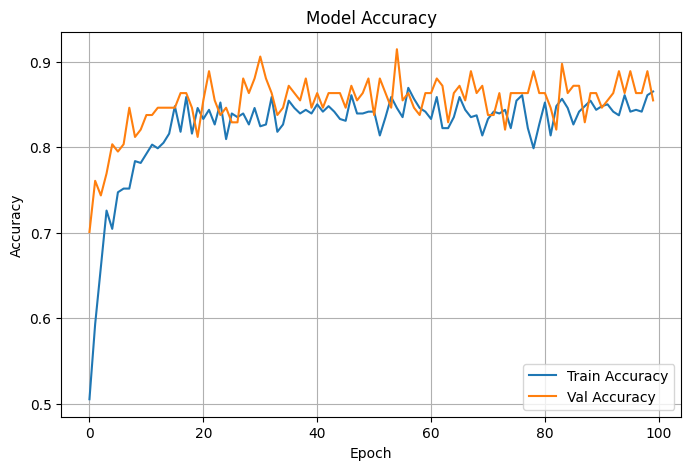

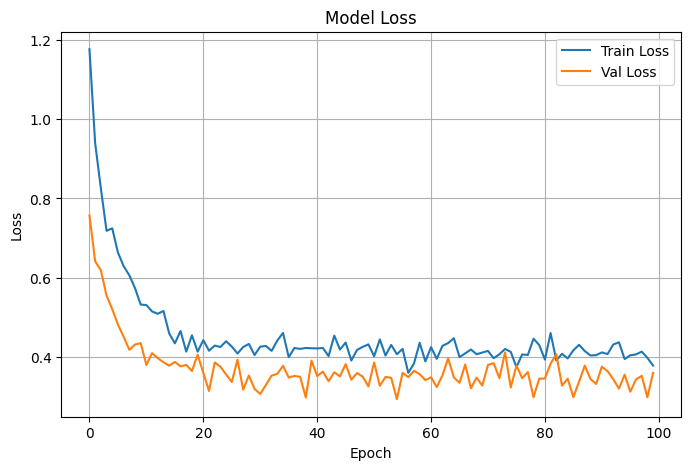

✅ Model saved successfully.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

# ==================== Train-Test Split ====================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.1, zoom_range=0.1, horizontal_flip=True
)
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# ==================== Model Architecture ====================
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet169 = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg19.layers:
    layer.trainable = False
for layer in densenet169.layers:
    layer.trainable = False

vgg19_feat = GlobalAveragePooling2D()(vgg19.output)
densenet_feat = GlobalAveragePooling2D()(densenet169.output)

merged = Concatenate()([vgg19_feat, densenet_feat])
x = Dense(512, activation='relu')(merged)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=[vgg19.input, densenet169.input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==================== Custom Dual Input Generator ====================
def dual_input_generator(generator):
    while True:
        x, y = next(generator)
        yield (x, x), y

# ==================== Wrap with tf.data.Dataset ====================
train_dataset = tf.data.Dataset.from_generator(
    lambda: dual_input_generator(train_generator),
    output_signature=(
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: dual_input_generator(val_generator),
    output_signature=(
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

# ==================== Checkpoints and Learning Rate Scheduling ====================
checkpoint_path = 'best_model.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# ==================== Training Loop with Resume ====================
history_file = 'train_history.pkl'

def load_history():
    try:
        with open(history_file, 'rb') as f:
            return pickle.load(f)
    except FileNotFoundError:
        return {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}

initial_epoch = len(load_history()['accuracy'])
total_epochs = 100
epochs_per_session = 100

while initial_epoch < total_epochs:
    print(f"\n📘 Starting training from epoch {initial_epoch} to {initial_epoch + epochs_per_session}")
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator),
        epochs=initial_epoch + epochs_per_session,
        initial_epoch=initial_epoch,
        callbacks=[checkpoint, reduce_lr]
    )

    prev_history = load_history()
    for key in history.history:
        if key in prev_history:
            prev_history[key].extend(history.history[key])
        else:
            prev_history[key] = history.history[key]

    with open(history_file, 'wb') as f:
        pickle.dump(prev_history, f)

    initial_epoch += epochs_per_session
    print(f"✅ Completed {initial_epoch} epochs. You can now switch to another Colab account and resume training.")

# ==================== Evaluation ====================
val_loss, val_accuracy = model.evaluate(val_dataset, steps=len(val_generator))
print(f"🔍 Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# ==================== Plotting ====================
with open(history_file, 'rb') as f:
    final_history = pickle.load(f)

plt.figure(figsize=(8, 5))
plt.plot(final_history['accuracy'], label='Train Accuracy')
plt.plot(final_history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(final_history['loss'], label='Train Loss')
plt.plot(final_history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ==================== Save Final Model ====================
model.save("hybrid_vgg19_densenet_skin_cancer.h5")
print("✅ Model saved successfully.")
